In [1]:
# 1. Importing all the necessary libraries. 
import tensorflow as tf 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
!unzip -q Data.zip

replace Data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# Getting the images for training 
imgArr = cv2.imread("Data/Training/1/Training_3908.jpg")

In [5]:
# Checking size of the image 
imgArr.shape

(48, 48, 3)

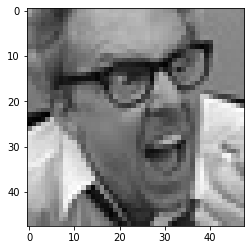

In [6]:
# Displaying the image
plt.imshow(imgArr)

In [7]:
# Creating a data directory 
DirectoryOfData = "Data/Training/" 

In [8]:
# Creating a list of classes which are named the same as the folder
Classes = ["1", "2", "3", "4", "5", "6", "7"]

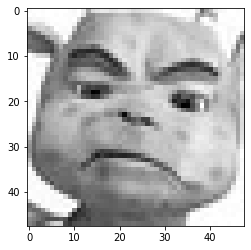

In [9]:
# Reading all the images in the folder 
for Category in Classes:
    path = os.path.join(DirectoryOfData, Category)
    for img in os.listdir(path):
        imgArr = cv2.imread(os.path.join(path,img))
#         imgtorgb = cv2.cvtColor(imgArr,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(imgArr, cv2.COLOR_BGR2RGB))
        plt.show()
        break 
    break

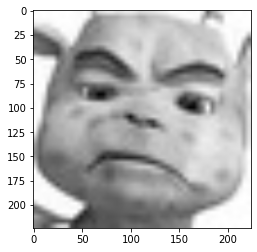

In [10]:
# Changing the size of the image 
# As ImageNet has a size of 224 x 224, the size is set as 224 
sizeOfImage = 224 
newArr = cv2.resize(imgArr,(sizeOfImage,sizeOfImage))
plt.imshow(cv2.cvtColor(newArr,cv2.COLOR_BGR2RGB))
plt.show()
# Therefore, the size will change from 48x48 to 224x224 

In [11]:
# Checking if the size has changed 
newArr.shape

(224, 224, 3)

In [12]:
# Reading all the images and converting them to an Array 
trainingSet = []

# Function to create the training data 
def createTrainingSet():
    for Category in Classes:
        path = os.path.join(DirectoryOfData, Category)
        numOfClass = Classes.index(Category)
        for img in os.listdir(path):
            try:
                imgArr = cv2.imread(os.path.join(path,img))
                newArr = cv2.resize(imgArr, (sizeOfImage, sizeOfImage))
                trainingSet.append([newArr,numOfClass])
            except Expection as e:
                pass

In [13]:
# Calling the function 
createTrainingSet()

In [14]:
# Checking the number of images that has read by the function 
print(len(trainingSet))

28709


In [15]:
# To avoid making the model learn the sequence, shuffling of the data is used 
import random 
random.shuffle(trainingSet)
# This helps the model to be more dynamic and robust 

In [16]:
# A and B are variables used for features and label  
A = [] 
B = []

for feature, label, in trainingSet:
    A.append(feature)
    B.append(label)

# Converting to 4 dimensions. 
A = np.array(A).reshape(-1,sizeOfImage, sizeOfImage, 3)

# Checking the shape 
A.shape

(28709, 224, 224, 3)

In [17]:
# # Normalising the data where 255 stands for black(maximum) and 0 stands for white(minimum)
# A = A/255.0; 

In [18]:
# Checking the type of B 
type(B)

list

In [19]:
# Converting to an array 
BB = np.array(B) 
# Checking the shape 
BB.shape

(28709,)

In [20]:
# Importing the libraries 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers

In [21]:
# Pre-trained model 
model = tf.keras.applications.MobileNetV2()

In [22]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [23]:
# The model is trained for 1000 classes which is showed as predictions(Dense) : (None, 1000) ==> therefore performing transfer learning 
baseInput = model.layers[0].input

In [24]:
# Getting only 7 classes 
baseOutput = model.layers[-2].output

In [25]:
baseOutput

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [26]:
# 1. Creating a new layer after the global average pooling layer (None, 1280)
finOutput = layers.Dense(128)(baseOutput)
# 2. Creating the activation function 
fOutput = layers.Activation('relu')(finOutput)
# 3. Creating another layer 
finOutput = layers.Dense(64)(finOutput)
# 4. Creating the activation function 
fOutput = layers.Activation('relu')(finOutput)
# Since the classes are 7, it will be reduced from 1000 to 7 
finOutput = layers.Dense(7,activation = 'softmax')(finOutput)

In [27]:
finOutput

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [28]:
newModel = keras.Model(inputs = baseInput, outputs = finOutput)

In [29]:
newModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [32]:
newModel.compile(loss="sparse_categorical_crossentropy", optimizer ="adam", metrics =["accuracy"])

In [ ]:
newModel.fit(A,BB, epochs = 1)

In [33]:
newModel.save('Model.h5')

In [35]:
newModel = tf.keras.models.load_model("Model.h5")

In [36]:
newModel.evaluate 

<bound method Model.evaluate of <keras.engine.functional.Functional object at 0x7f88ef8cb610>>

In [41]:
new = cv2.imread("girl.jpg")

In [42]:
new.shape

(933, 1400, 3)

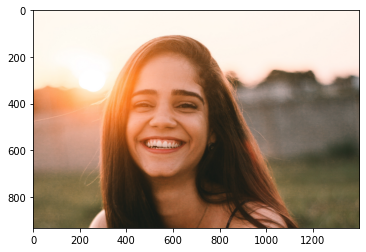

In [43]:
plt.imshow(cv2.cvtColor(new,cv2.COLOR_BGR2RGB))